In [16]:
# INITIAL PACKAGES
import os
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

## Load Data

In [17]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

## IMAGE PREPROCESSING

In [18]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [19]:
# RESHAPE
tr_s = train_images.shape
train_images = train_images.reshape((tr_s[0], tr_s[1], tr_s[2], 1))
te_s = test_images.shape
test_images = test_images.reshape((te_s[0], te_s[1], te_s[2], 1))

In [20]:
# Random value labeling (to regression)
np.random.seed(0)
#train_labels = np.random.rand(train_images.shape[0])
#test_labels = np.random.rand(test_images.shape[0])
train_labels = np.random.normal(0, 0.1, train_images.shape[0])
test_labels = np.random.normal(0, 0.1, test_images.shape[0])

## Modeling

In [21]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

In [22]:
class CNN():
  model = None
  def __init__(self):
    self.model = Sequential()
    self.model.add(Conv2D(filters=64,
                    kernel_size=(5, 5),
                    strides=(1, 1),
                    padding='same',
                    activation='relu',
                    input_shape=(28, 28, 1)))
    self.model.add(Conv2D(filters=64,
                    kernel_size=(3, 3),
                    strides=(1, 1),
                    activation='relu',
                    padding='same'))
    self.model.add(MaxPooling2D(pool_size=(2, 2),
                          strides=(2, 2)))
    self.model.add(Conv2D(filters=128,
                    kernel_size=(3, 3),
                    strides=(1, 1),
                    activation='relu',
                    padding='same'))
    self.model.add(Conv2D(filters=128,
                    kernel_size=(3, 3),
                    strides=(1, 1),
                    activation='relu',
                    padding='same'))
    self.model.add(MaxPooling2D(pool_size=(2, 2),
                          strides=(2, 2)))
    #self.model.add(Dropout(0.25))
    self.model.add(Conv2D(filters=256,
                    kernel_size=(3, 3),
                    strides=(1, 1),
                    activation='relu',
                    padding='same'))
    self.model.add(Conv2D(filters=256,
                    kernel_size=(3, 3),
                    strides=(1, 1),
                    activation='relu',
                    padding='same'))
    self.model.add(MaxPooling2D(pool_size=(2, 2),
                          strides=(2, 2)))
    #self.model.add(Dropout(0.5))
    self.model.add(Conv2D(filters=512,
                    kernel_size=(3, 3),
                    strides=(1, 1),
                    activation='relu',
                    padding='same'))
    self.model.add(Conv2D(filters=512,
                    kernel_size=(3, 3),
                    strides=(1, 1),
                    activation='relu',
                    padding='same'))
    self.model.add(MaxPooling2D(pool_size=(2, 2),
                          strides=(2, 2)))
    #self.model.add(Dropout(0.5))
    self.model.add(Flatten())
    self.model.add(Dense(units=4096, activation='tanh'))
    #self.model.add(Dropout(0.5))
    self.model.add(Dense(units=4096, activation='tanh'))
    #self.model.add(Dropout(0.5))
    self.model.add(Dense(units=1000, activation='tanh'))
    self.model.add(Dense(units=1))

    self.model.compile(loss='mae',
                  optimizer='adam',
                  metrics=['mae', 'mse'])

In [23]:
def train(train_images, train_labels, test_images, test_labels):
    # PARAMETERS
    epoch = 15
    batch_size = 512
  
    # BUILD YOUR MODEL 
    model = CNN().model

    %%time
    hist = model.fit(train_images, train_labels, epochs=epoch, batch_size=batch_size,
              validation_data=(test_images[:8000], test_labels[:8000]), verbose=1)
    
    plt.plot(hist.history['mse'], 'b-', label="training")
    plt.plot(hist.history['val_mse'], 'r:', label="validation")
    plt.legend()
    plt.show()
    
    # Make prediction data frame
    test_pred = model.predict(test_images[8000:])
    pred_labels = test_labels[8000:]
    index = np.argsort(pred_labels)
    scatter = plt.scatter(np.arange(index.shape[0]), test_pred[index], c = 'r', s = 0.1)
    scatter = plt.scatter(np.arange(index.shape[0]), pred_labels[index], c = 'b', s = 0.1)
    plt.show()

    return model

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 5.01 µs
Epoch 1/15
118/118 [==============================] - 14s 120ms/step - loss: 0.2484 - mae: 0.2484 - mse: 2.2141 - val_loss: 0.0847 - val_mae: 0.0847 - val_mse: 0.0112
Epoch 2/15
118/118 [==============================] - 13s 114ms/step - loss: 0.0818 - mae: 0.0818 - mse: 0.0105 - val_loss: 0.0823 - val_mae: 0.0823 - val_mse: 0.0106
Epoch 3/15
118/118 [==============================] - 14s 115ms/step - loss: 0.0812 - mae: 0.0812 - mse: 0.0104 - val_loss: 0.0828 - val_mae: 0.0828 - val_mse: 0.0108
Epoch 4/15
118/118 [==============================] - 14s 116ms/step - loss: 0.0800 - mae: 0.0800 - mse: 0.0101 - val_loss: 0.0819 - val_mae: 0.0819 - val_mse: 0.0105
Epoch 5/15
118/118 [==============================] - 14s 117ms/step - loss: 0.0802 - mae: 0.0802 - mse: 0.0101 - val_loss: 0.0795 - val_mae: 0.0795 - val_mse: 0.0099
Epoch 6/15
118/118 [==============================] - 14s 118ms/step - loss: 0.0798 - mae: 0.0798

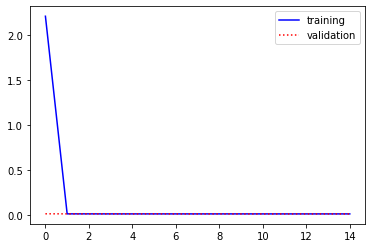

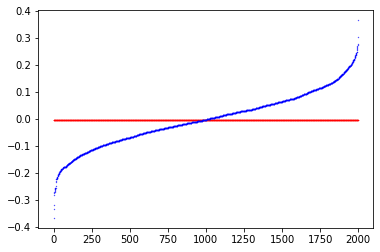

In [24]:
a = train(train_images, train_labels, test_images, test_labels)